In [243]:
import pandas as pd
import numpy as np

In [244]:
bike = pd.read_csv('./train.csv')

In [245]:
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


datetime - hourly date + timestamp (날짜와 시간)

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter (계절)

holiday - whether the day is considered a holiday (휴일)

workingday - whether the day is neither a weekend nor holiday (평일)

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy (맑은 날씨)

​ 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (안개)

​ 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (가벼운 눈, 비)

​ 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (폭설, 폭우)

temp - temperature in Celsius (온도)

atemp - “feels like” temperature in Celsius (체감 온도)

humidity - relative humidity (상대 습도)

windspeed - wind speed (풍속)

casual - number of non-registered user rentals initiated (비회원 대여량)

registered - number of registered user rentals initiated (회원 대여량)

count - number of total rentals (총 대여량)

In [246]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [247]:
#결측치 확인
bike.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [248]:
#object인 datetime을 datetime 속성으로 변경

bike['datetime'] = pd.to_datetime(bike['datetime'])

- datetime 속성은 회귀분석이 불가능 (회귀분석은 정수형 실수형 데이터만 가능)
- datetime 을 쪼개 준다
- 1시간 단위로 나뉘어져 있기에 second와 minute은 굳이 나누지 않았다

In [249]:
bike['year'] = bike['datetime'].dt.year
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour
 
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [250]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

# 시각화

C:\Users\kinsh\AppData\Local\Temp/ipykernel_4960/2990114320.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  bike[['temp', 'atemp', 'humidity', 'windspeed']].hist(bins=50, ax=ax) #bins = 가로축 구간 갯수


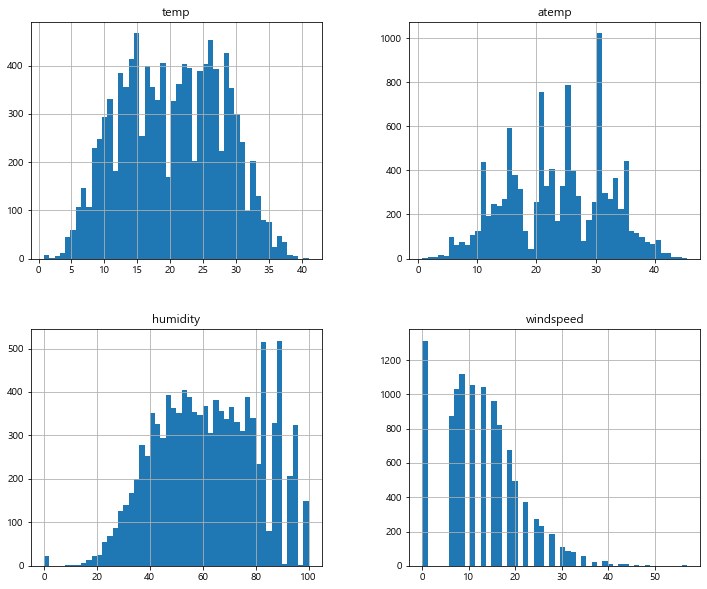

In [251]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,10))
bike[['temp', 'atemp', 'humidity', 'windspeed']].hist(bins=50, ax=ax) #bins = 가로축 구간 갯수
plt.show()

- temp = 온도, atemp = 체감 온도, humidity = 습도, windspeed = 풍속

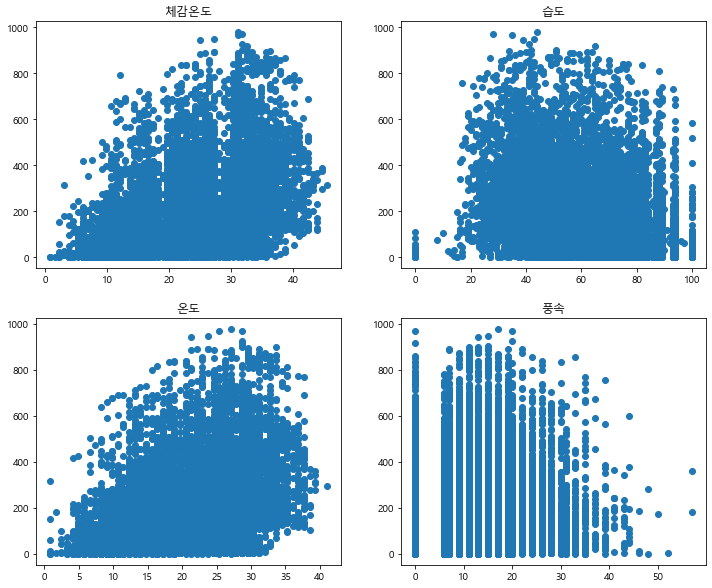

In [252]:
from matplotlib import font_manager,rc

fig, ax = plt.subplots(2,2, figsize=(12,10))
ax[0][0].scatter(bike['atemp'], bike['count'])
ax[0][1].scatter(bike['humidity'], bike['count'])
ax[1][0].scatter(bike['temp'], bike['count'])
ax[1][1].scatter(bike['windspeed'], bike['count'])

ax[0][0].set(title='체감온도')
ax[0][1].set(title='습도')
ax[1][0].set(title='온도')
ax[1][1].set(title='풍속')
plt.rc('font', family="Malgun Gothic")
plt.show()

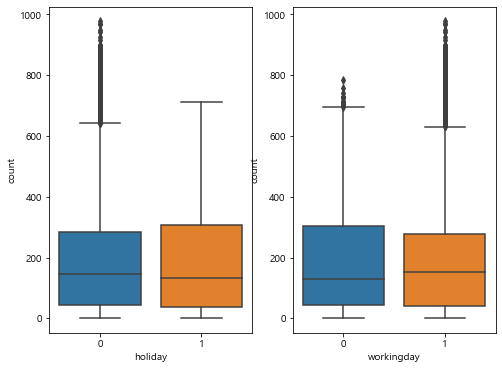

In [253]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(8,6))
sns.boxplot(data=bike, x='holiday', y='count', ax=ax[0])
sns.boxplot(data=bike, x='workingday', y='count', ax=ax[1])
 
plt.show()

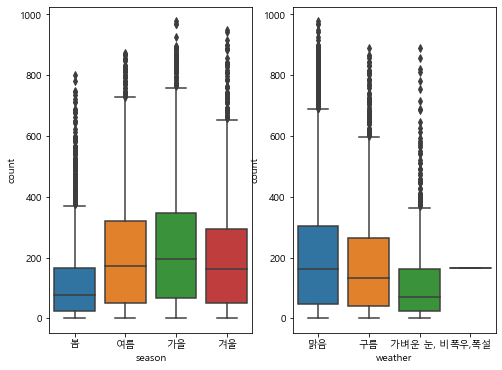

In [254]:
fig, ax = plt.subplots(1, 2, figsize=(8,6))
 
sns.boxplot(data=bike, x='season', y='count', ax=ax[0])
sns.boxplot(data=bike, x='weather', y='count', ax=ax[1])
 
ax[0].set(xticklabels=['봄', '여름', '가을', '겨울'])
ax[1].set(xticklabels=['맑음', '구름', '가벼운 눈, 비', '폭우,폭설'])
plt.rc('font', family="Malgun Gothic") 
plt.show()

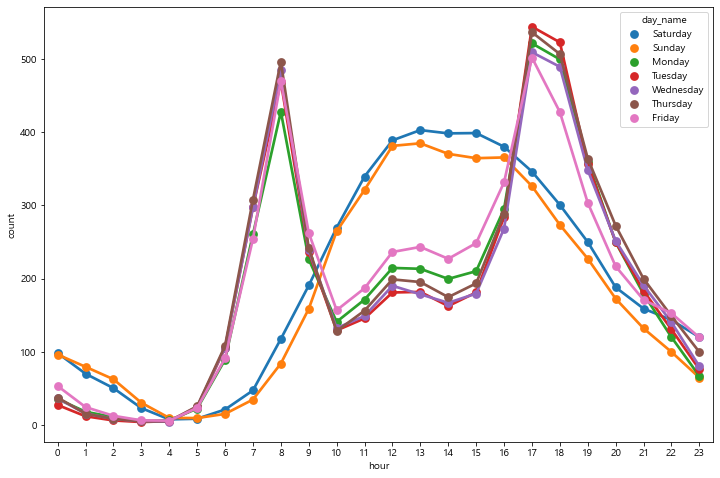

In [255]:
bike['day_name'] = bike['datetime'].dt.day_name()

fig, ax = plt.subplots(figsize=(12,8)) 
sns.pointplot(data=bike, x='hour', y='count',hue='day_name', ax=ax, ci=None)
 
plt.show()

# p-value

In [256]:
p_bike = bike
p_bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,Wednesday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,Wednesday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,Wednesday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,Wednesday


In [257]:
# p-value를 확인하기 위해 count(자전거 수요량)을 target으로 지정하고 log_count 컬럼 추가

target = p_bike['count']
p_bike["log_count"] = np.log(target+1)
feature_names = list(p_bike)
df_train = p_bike[feature_names]
bike_df = pd.concat((df_train,p_bike))

In [258]:
# 검증하기 위해 data를 train과 validation으로 나누기
new_train = bike_df[:p_bike.shape[0]]
new_test = bike_df[p_bike.shape[0]:]
target = p_bike['log_count']

In [259]:
# float형태만 남기기 위해 datetime 컬럼은 기존에 나눠줬으므로 제거 day_name도 제거
new_train = new_train.drop(['datetime'], axis = 'columns')
new_train = new_train.drop(['day_name'], axis = 'columns')

In [260]:
import statsmodels.api as sm
model = sm.OLS(target.values, new_train.astype(float))
re = model.fit()
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.299e+32
Date:                Wed, 25 May 2022   Prob (F-statistic):                        0.00
Time:                        18:17:28   Log-Likelihood:                      3.3410e+05
No. Observations:               10886   AIC:                                 -6.682e+05
Df Residuals:                   10871   BIC:                                 -6.681e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season      9.992e-16   4.15e-16      2.406      0.016    1.85e-16    1.81e-15
holiday    -8.847e-15   6.82e-16    -12.976      0.000   -1.02e-14   -7.51e-15
workingday -5.107e-15   2.79e-16    -18.273      0.000   -5.65e-15   -4.56e-15
weather    -8.049e-16   1.92e-16     -4.186      0.000   -1.18e-15   -4.28e-16
temp       -1.665e-16   8.34e-17     -1.997      0.046    -3.3e-16   -3.04e-18
atemp       9.714e-17   7.68e-17      1.265      0.206   -5.34e-17    2.48e-16
humidity   -6.505e-18   7.44e-18     -0.874      0.382   -2.11e-17    8.08e-18
windspeed   1.561e-17   1.46e-17      1.068      0.286   -1.31e-17    4.43e-17
casual     -1.431e-17   2.32e-18     -6.171      0.000   -1.89e-17   -9.77e-18
registered -1.648e-17    1.5e-18    -10.982      0.000   -1.94e-17   -1.35e-17
count       5.551e-17    1.1e-18     50.323      0.000    5.33e-17    5.77e-17
year       -6.614e-18   4.21e-19    -15.703      0.000   -7.44e-18   -5.79e-18
month       5.274e-16   1.35e-16      3.900      0.000    2.62e-16    7.92e-16
day        -9.736e-17   1.99e-17     -4.891      0.000   -1.36e-16   -5.83e-17
hour       -3.123e-17   1.97e-17     -1.583      0.114   -6.99e-17    7.45e-18
log_count      1.0000   1.54e-16   6.49e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      972.924   Durbin-Watson:                   0.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1249.987
Skew:                          -0.810   Prob(JB):                    3.70e-272
Kurtosis:                       3.360   Cond. No.                     7.71e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 7.53e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 모델링

In [261]:
# datetime, day, day_name, year 제거
bike.drop(['datetime', 'day', 'day_name', 'year'], inplace=True, axis=1)  # datetime은 나눠서 컬럼 추가했기 때문에 삭제
 
# month, hour 은 범주형으로 변경
bike['month'] = bike['month'].astype('category')
bike['hour'] = bike['hour'].astype('category')
 
# 계절과 날씨는 범주형 데이터인데 숫자로 표기되어있기 떄문에 dummies를 활용해 구분합니다
bike = pd.get_dummies(bike, columns=['season','weather'])

# casual, registered 제거
bike.drop(['casual', 'registered'], inplace=True, axis=1)  # 테스트 셋에는 casual, registered가 없어서 삭제

# 시각화에서 temp와 atemp는 매우 유사한 상관관계기 떄문에 atemp 삭제
bike.drop('atemp', inplace=True, axis=1)

bike.head()

,holiday,workingday,temp,humidity,windspeed,count,month,hour,log_count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,9.84,81,0.0,16,1,0,2.833213,1,0,0,0,1,0,0,0
1,0,0,9.02,80,0.0,40,1,1,3.713572,1,0,0,0,1,0,0,0
2,0,0,9.02,80,0.0,32,1,2,3.496508,1,0,0,0,1,0,0,0
3,0,0,9.84,75,0.0,13,1,3,2.639057,1,0,0,0,1,0,0,0
4,0,0,9.84,75,0.0,1,1,4,0.693147,1,0,0,0,1,0,0,0


# train set에 적용 시켰던 일을 테스트 셋에도 적용

In [262]:

test_data = pd.read_csv('./test.csv')

test_data['datetime'] = pd.to_datetime(test_data['datetime'])
test_data['month'] = test_data['datetime'].dt.month
test_data['hour'] = test_data['datetime'].dt.hour

test_data['month'] = test_data['month'].astype('category')
test_data['hour'] = test_data['hour'].astype('category')
 
test_data = pd.get_dummies(test_data, columns=['season','weather'])
 
# 사용하지 않는 feature 삭제
drop_feature = ['datetime', 'atemp']
test_data.drop(drop_feature, inplace=True, axis=1)

test_data.head()

,holiday,workingday,temp,humidity,windspeed,month,hour,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,1,10.66,56,26.0027,1,0,1,0,0,0,1,0,0,0
1,0,1,10.66,56,0.0000,1,1,1,0,0,0,1,0,0,0
2,0,1,10.66,56,0.0000,1,2,1,0,0,0,1,0,0,0
3,0,1,10.66,56,11.0014,1,3,1,0,0,0,1,0,0,0
4,0,1,10.66,56,11.0014,1,4,1,0,0,0,1,0,0,0


In [263]:
# train셋과 test 셋 8:2 분류
# id와 예측할 count 컬럼 추가 및 분류

from sklearn.model_selection import train_test_split

def exam_data_load(bike, target, id_name="", null_name=""):
    if id_name == "":
        bike = bike.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        bike[bike == null_name] = np.nan
    
    X_train, X_test = train_test_split(bike, test_size=0.2, shuffle=True, random_state=2021)
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[id_name, target])
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[id_name, target])
    return X_train, X_test, y_train, y_test 
    
X_train, X_test, y_train, y_test = exam_data_load(bike, target='count')#, id_name='Id')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 16), (2178, 16), (8708, 2), (2178, 2))

In [264]:
# score 제작 준비
from sklearn.metrics import make_scorer
 
# RMSLE 함수 정의
def RMSLE(predicted_values, actual_values):
    
    # 예측값과 실제 값을 numpy 배열 형태로 변환
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그 변환 
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 로그 변환한 예측값에서 로그 변환한 실제 값을 빼고 제곱
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 위에서 계산한 값의 평균
    mean_difference = difference.mean()
    
    # 위에서 계산한 값에 루트
    score = np.sqrt(mean_difference)
    
    return score
 
rmsle_score = make_scorer(RMSLE)

RMSLE는 회귀 평가 지표이며 낮을수록 예측값과 실제값의 차이가 적기 때문에 회귀평가 지표를 만들어 줍니다

In [265]:
#사용할 모델

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.ensemble import BaggingRegressor 
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [266]:
# kfold 설정
kfold = KFold(n_splits=10, random_state=1230, shuffle=True)

In [267]:
#target 설정

target = bike['count']

In [268]:

# 사용할 모델 설정
models = [RandomForestRegressor(), AdaBoostRegressor(), BaggingRegressor()]
regressors = ['RandomForest', 'AdaBoost', 'Bagging']
score_result = []
 
# Kfold 교차 검증
for x in models:
    Rgr = x
    score = cross_val_score(Rgr, bike, target, cv=kfold, scoring=rmsle_score)
    score_result.append(score.mean())
    
#결과를 dataframe 으로 변경
Kfold_score_result = pd.DataFrame({'Score' : score_result}, index=regressors) 
Kfold_score_result 


,Score
RandomForest,0.000296
AdaBoost,0.658538
Bagging,0.000336


- score가 낮을수록 예측값과 실제값의 차이가 적으므로 좋음
- randomforest가 가장 좋아보임

In [269]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train)
print(X_test)

[[-0.1683508  -1.47623254 -0.48752398 ... -0.58919731 -0.29196621
  -0.01071681]
 [-0.1683508   0.67740005  1.62123762 ... -0.58919731 -0.29196621
  -0.01071681]
 [-0.1683508  -1.47623254 -0.59296206 ... -0.58919731 -0.29196621
  -0.01071681]
 ...
 [-0.1683508  -1.47623254 -0.17120974 ... -0.58919731 -0.29196621
  -0.01071681]
 [-0.1683508   0.67740005 -0.3820859  ...  1.69722433 -0.29196621
  -0.01071681]
 [-0.1683508   0.67740005  0.03966642 ... -0.58919731 -0.29196621
  -0.01071681]]
[[-0.18356797 -1.4011657   1.26845825 ... -0.60953796 -0.29558239
   0.        ]
 [-0.18356797  0.71369147  1.16394109 ... -0.60953796 -0.29558239
   0.        ]
 [-0.18356797 -1.4011657  -0.92640209 ... -0.60953796 -0.29558239
   0.        ]
 ...
 [-0.18356797  0.71369147 -0.71736778 ... -0.60953796 -0.29558239
   0.        ]
 [-0.18356797  0.71369147  1.47749257 ... -0.60953796 -0.29558239
   0.        ]
 [ 5.44757344 -1.4011657   0.1187695  ... -0.60953796 -0.29558239
   0.        ]]


In [270]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X_train,y_train['count'],test_size = 0.15, random_state = 42)

In [271]:
from sklearn.metrics import accuracy_score, mean_squared_error
rf = RandomForestRegressor()
rf.fit(X_tr,y_tr)
y_pred = rf.predict(X_ts)
print(rf.score(X_tr,y_tr))
print(round(np.sqrt(mean_squared_error(y_ts,y_pred)),3))

0.9999993214129304
0.44


In [272]:
rf.fit(X_train, y_train['count'])
final_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test['count'], final_pred)
np.sqrt(rf_mse)

2.161550029669026

In [273]:
sub = pd.DataFrame({'id' : y_test['id'], 'count' : final_pred})
sub.to_csv('./sampleSubmission.csv',index=False)

In [274]:
pd.read_csv('./sampleSubmission.csv')

,id,count
0,8705,75.00
1,3262,293.99
2,5193,239.00
3,8969,16.00
4,7614,277.00
...,...,...
2173,7936,25.00
2174,4583,18.00
2175,1279,5.00
2176,8195,397.01
